### Solar Panel Placement Optimization Notebook 

We recommend to write your code in Python, so that your workflow can be seen using this notebook. However, feel free to use other languages and tools that you are comfortable with. 

Please generate images to illustrate how your algorithm works. 

Have fun! 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
import math


In [4]:
#helper function to plot polygon
def plot_polygon(coords):
    #Given each point is (x,y)
    x_coord = [p[0] for p in coords]
    y_coord = [p[1] for p in coords]

    plt.plot(x_coord + [x_coord[0]], y_coord + [y_coord[0]], color='green')
    plt.show()

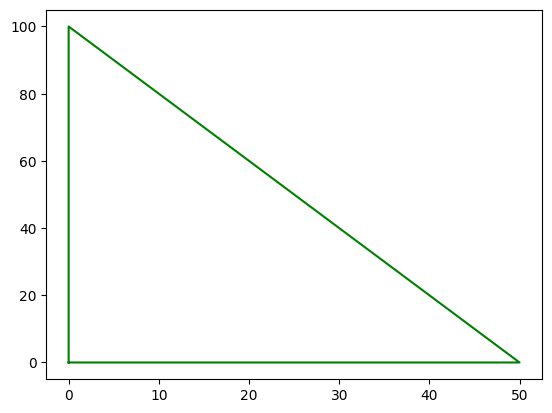

In [5]:
#testing
polygon = [(0,0), (0, 100), (50, 0)]
plot_polygon(polygon)

In [6]:
#helper function to plot rectangle
#a filled rectangle represents a panel inside the polygon
def plot_rect(startX, startY, length, width):
    # order: btm-left, top-left, top-right, btm-right, closed
    coords = [(startX, startY), (startX, startY+length), (startX+width, startY+length), (startX+width, startY)]
    x_coord = [p[0] for p in coords]
    y_coord = [p[1] for p in coords]

    plt.plot(x_coord + [x_coord[0]], y_coord + [y_coord[0]], color='red')


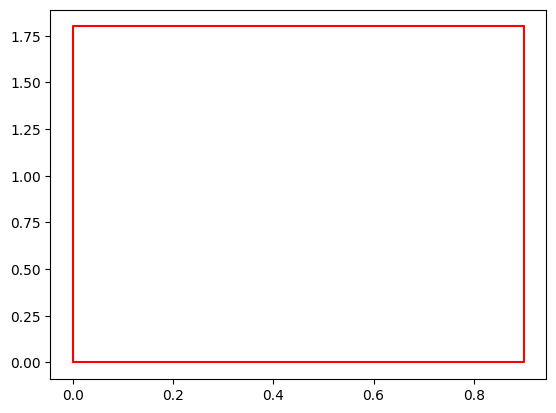

In [7]:
#testing
plot_rect(0, 0, 1.8, 0.9)

In [11]:
#helper function to plot an array of rect
def plot_rect_array(coords, length, width):
    for(x, y) in coords:
        plot_rect(x, y, length, width)


In [12]:
#helper function to generate base off ammount in col, and row
def initializePanel(numX, numY, length, width, offset_x, offset_y):
    retArr = []
    for y in range (0, numY):
        for x in range (0, numX):
            (x_c, y_c) = x*offset_x + x*width, y*offset_y + y*length
            retArr.append( (x_c, y_c))
    return retArr 

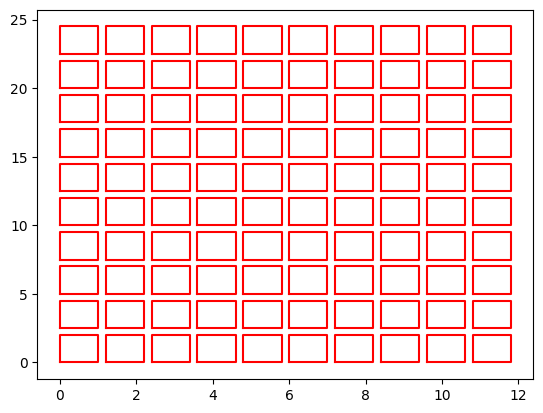

In [13]:
#testing
rs = initializePanel(10, 10, 2, 1, 0.2, 0.5)
plot_rect_array(rs, 2, 1)

In [14]:
#helper function to rotate polygon by a radian degree
def transform(x, y, rad):
    t_x = x*math.cos(rad) - y * math.sin(rad)
    t_y = x*math.sin(rad) + y * math.cos(rad)
    return t_x, t_y

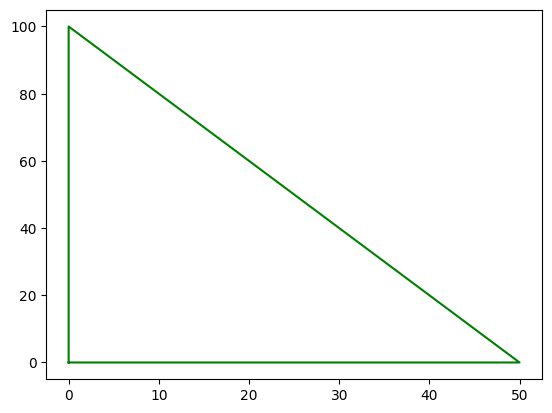

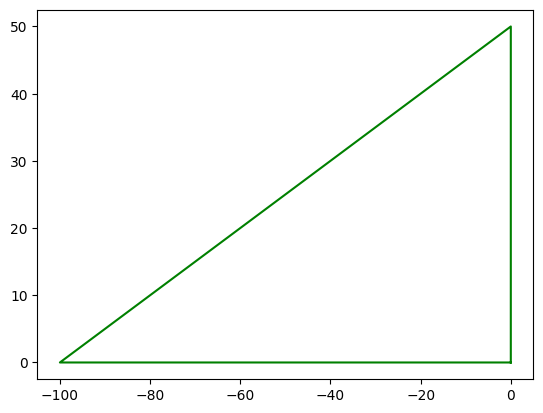

In [15]:
#testing
polygon = [(0,0), (0, 100), (50, 0)]
plot_polygon(polygon)
rad = 90/180*math.pi
n_polygon = np.array([transform(x,y,rad) for (x,y) in polygon])
plot_polygon(n_polygon)


In [16]:
# helper function to check if all 4 corners of panel is inside the polygon
def isInside(x, y, length, width, polygon):
    path = mpltPath.Path(polygon)
    result = path.contains_points([(x, y), (x, y+length), (x+width, y+length), (x+width, y)])
    return np.all(result)

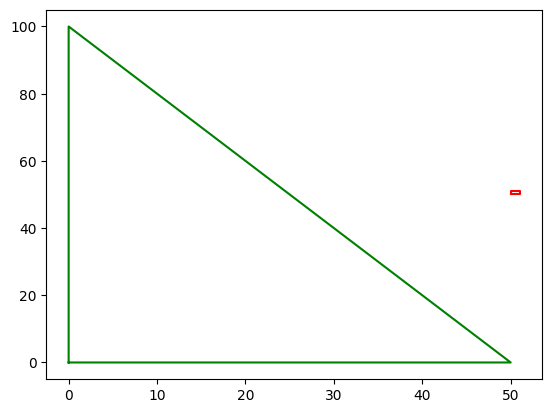

Is inside?: False


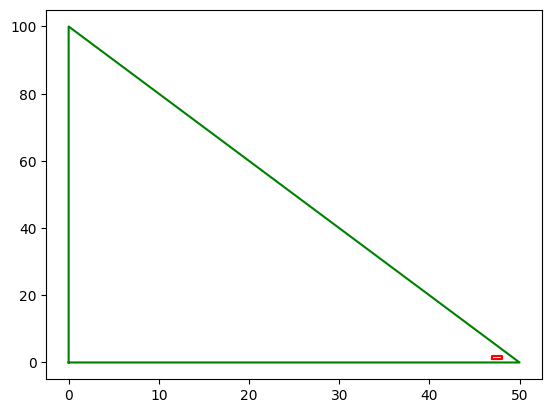

Is inside?: True


In [20]:
#testing
polygon = [(0,0), (0, 100), (50, 0)]
plot_rect(50, 50, 1, 1)
plot_polygon(polygon)
print("Is inside?:", isInside(50,50,1,1, [(0,0), (0, 100), (50, 0)]))

polygon = [(0,0), (0, 100), (50, 0)]
plot_rect(47, 1, 1, 1)
plot_polygon(polygon)
print("Is inside?:", isInside(47, 1,1,1, [(0,0), (0, 100), (50, 0)]))

In [21]:
def sol(polygon, length, width):
    max = 0
    azimuth = None
    leftShift = None
    rightShift = None
    result = None
    bestPolygon = None
    #Brute force approach
    #thought process: initilize grid by panel size given, cast polygon onto the grid, roat
    for angle in range(0, 360, 10):
        rad = angle/180*math.pi
        polygon = np.array([transform(x,y,rad) for (x,y) in polygon])

        #shift polygon to pos axis
        minX = polygon[:,0].min()
        minY = polygon[:,1].min()
        polygon[:,0] -= (minX -1)
        polygon[:,1] -= (minY -1)


        #get max val to eval how much panel to initilize
        maxX = polygon[:,0].max()      
        maxY = polygon[:,1].max()

        #numbers of x panel and y panels needed
        numX = int(maxX // width + width)
        numY = int(maxY // length + length)

        # shifting x,y by length,width
        for shiftY in range (-length, length):
            for shiftX in range (-width, width):
                panels = initializePanel(numX, numY, length, width, 0.2, 0.5)
                panelsInside = [(x,y) for (x,y) in panels if isInside(x,y,length,width, polygon)]

                if len(panelsInside) > max:
                    azimuth = angle
                    leftShift = shiftX
                    rightShift = shiftY
                    max = len(panelsInside)
                    result = panelsInside
                    bestPolygon = polygon
                    
    plot_rect_array(result, length, width)
    plot_polygon(bestPolygon)
    plt.show()
    print("Azimuth:",azimuth, "Left-shift:", leftShift, "Right-shift:", rightShift,"Panels:", max)


Panel Size: 2m x 1m


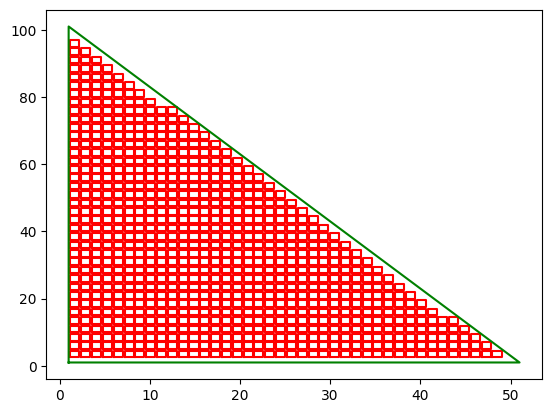

Azimuth: 80 Left-shift: -1 Right-shift: -2 Panels: 776
Panel Size: 2.3m x 1m


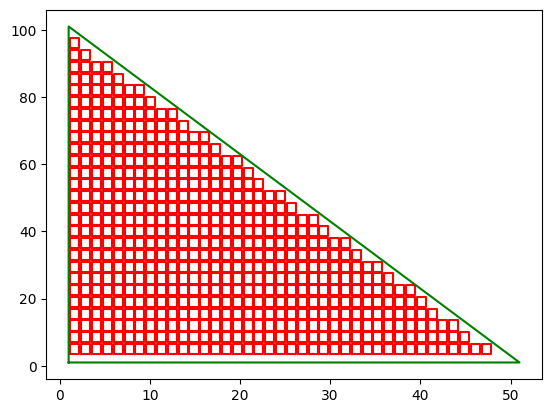

Azimuth: 0 Left-shift: -1 Right-shift: -3 Panels: 537
Panel Size: 1.8m x 0.9m


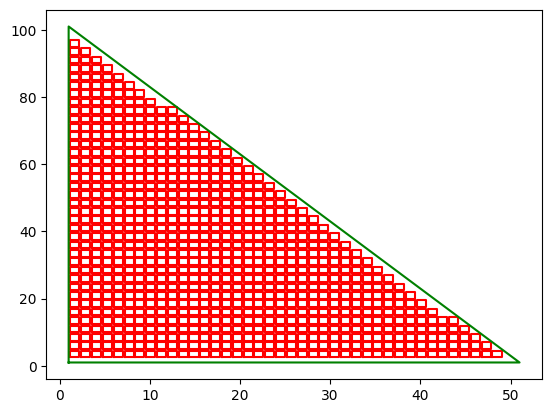

Azimuth: 80 Left-shift: -1 Right-shift: -2 Panels: 776
Panel Size: 2m x 1m


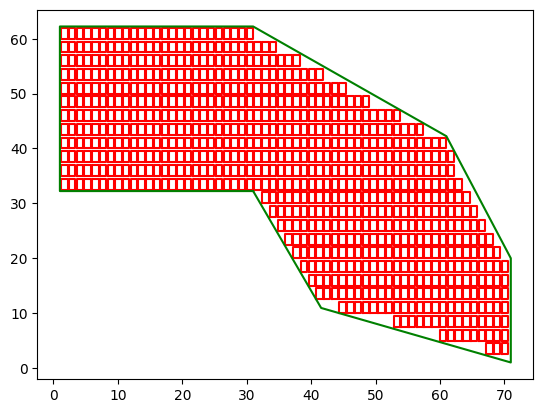

Azimuth: 90 Left-shift: -1 Right-shift: -2 Panels: 752
Panel Size: 2.3m x 1m


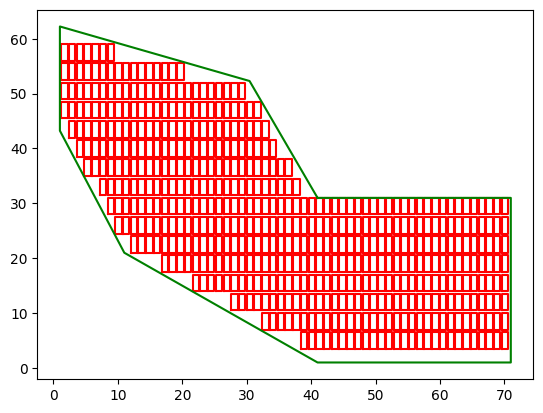

Azimuth: 260 Left-shift: -1 Right-shift: -3 Panels: 511
Panel Size: 1.8m x 0.9m


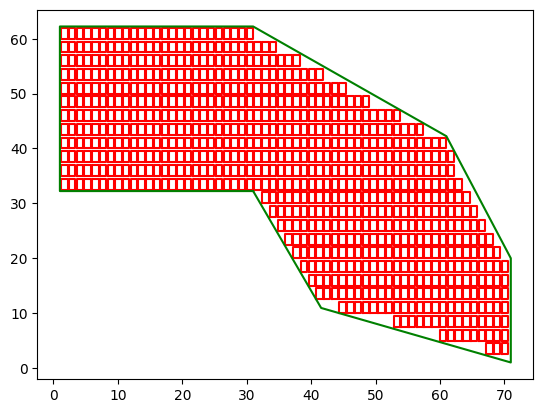

Azimuth: 90 Left-shift: -1 Right-shift: -2 Panels: 752
Panel Size: 2m x 1m


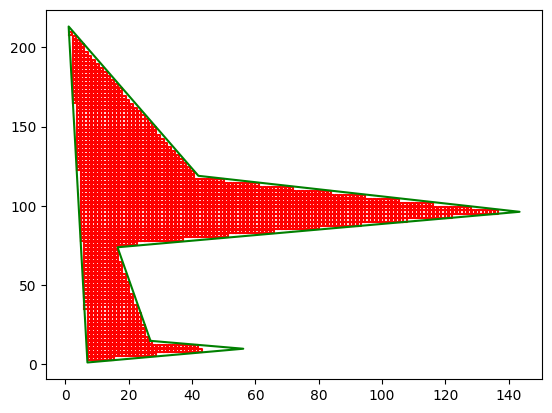

Azimuth: 10 Left-shift: -1 Right-shift: -2 Panels: 2096
Panel Size: 2.3m x 1m


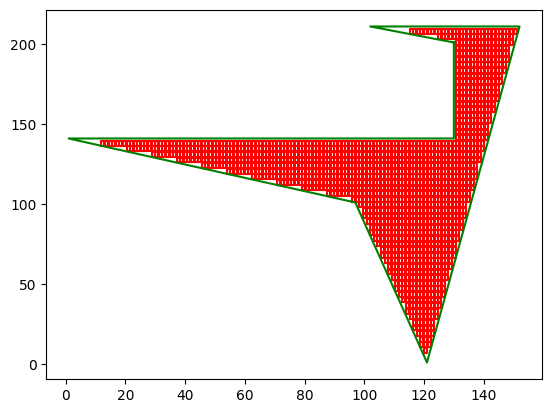

Azimuth: 270 Left-shift: -1 Right-shift: -3 Panels: 1468
Panel Size: 1.8m x 0.9m


In [ ]:
polygons = [[(0,0), (0, 100), (50, 0)],[(1.12, 130.83), (1.12, 160.83), (31.12, 160.83), (31.12, 130.83), (11.12, 100.83), (-11.12, 90.83), (-30.12, 90.83), (-20.182, 120.273)],[(2, 100), (2,160), (131, 160), (35, 200), (11, 300), (-20 , 90), (30, 90)]]
panels = [(2,1),(2.3,1),(1.8,0.9)]

for polygon in polygons:
    for panel in panels:
        print(f"Panel Size: {panel[0]}m x {panel[1]}m")
        sol(polygon,math.ceil(panel[0]), math.ceil(panel[1]))